In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', -1)

#git status, git add , git commit -m "", git push

C:\Users\berns\AppData\Local\Temp\ipykernel_4632\1932434941.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
fam = pd.read_csv('../data/family_2023update.csv')

In [3]:
fam = fam.drop(['Timestamp', 'Username'], axis=1)
fam = fam.fillna('*shrug*')

In [4]:
fam = fam.rename(columns={'What is your full name':'Name',
                    'What is your birthday?':'Birthday', 
                    'What is your favorite holiday?': 'Favorite Holiday',
                    'Tell me a fun fact! it can be personal, random, whatever':'Fun Fact',
                    'favorite college basketball team': 'Fav College Bball', 
                    'where do you live?': 'Resides',
                    'what is the next place youre going to travel':'Next Destination',
                    "what's something on your bucket list":'Bucket List', 
                    "What's your secret talent?": 'Secret Talent',
                    'What is something youre dedicated to? (ex. reality tv, a hobby, sport, religion, your kid)':'Dedication Towards',
                    "what is a hobby or skill you'd like to dedicate yourself to? (practicing base guitar, jumping out of planes, scuba diving)": 'Dedication Goalz',
                    'favorite restaurant in the area you live' : 'Yummy',
                    "What do you look forward to at Briana's wedding? ": 'Bribri Partay',
                    'If you could have written a question for this survey, what would it have been? (I will most likely screen shot this and share in club tofurkey)':'Your Own Q'})

In [5]:
fam['Fav College Bball'] = fam['Fav College Bball'].str.replace('None','*shrug*')

In [6]:
fam['Birthday'].dtypes

dtype('O')

In [7]:
fam.loc[fam['Name'] == 'Raizel Bernstein', 'Birthday'] = '1993-06-27'

In [8]:
fam.style.set_properties(subset=['Occupation'], **{'width':'40px'})
fam.style.set_properties(subset=['Your Own Q', 'Dedication Goalz', 'Fun Fact'], **{'width':'250px'})
fam

,Name,Birthday,Occupation,Favorite Holiday,Fun Fact,Fav College Bball,Resides,Next Destination,Bucket List,Secret Talent,Dedication Towards,Dedication Goalz,Yummy,Bribri Partay,Your Own Q
0,Briana Marmelstein,1996-10-05,Genetic Counselor,thanksgiving,I'm hopefully publishing a paper in 2023!,Whoever wins me money or Penn State,Conshy aka Philly Suburb,South of France,See the Rangers win the Stanley Cup!,Painting my nails,Bravo shows,"Eh, I'd rather do a lot of things than honing one skill...but no diving, sky or otherwise",Zahav,Being the bride,Who are the ultimate coke and pepsi champs and why are they Briana and Eliana
1,Raizel Bernstein,1993-06-27,Data Analyst,thanksgiving,im moving to jersey shore for most of the summer,Terps ... duh,NJ,sea girt NJ,break 6 minutes in the mile,intuition,prob about to get dedicated to running again,running so fast I can break a 6 min mile,diners,come&pepsi,*shrug*
2,Nina Rebeca Bigler,1994-04-25,*shrug*,hanukkah,*shrug*,*shrug*,Israel,Puerto Rico,*shrug*,*shrug*,Speaking to Max in English,Writing,Tziona Cafe,*shrug*,*shrug*
3,Ariel Abrahams,1988-01-30,Soundproofing,xmas,"Zoey can say ""okeedokie!""",Terps,Brooklyn,Seattle,Join a ceramics studio,I can play guitar,keeping zozo healthy!,"long, long walks",Hamiltons,everything!,What will you be wearing to Myle's Open Bar Mitzvah?
4,Andrew Fitter,2001-02-22,Software Developer Engineer,thanksgiving,I’m about to buy tickets to bonnaroo music festival!,Virginia Tech,Virginia,Japan,Climb the nose on el cap,I’m really good at the chesties bar game,Climbing,Skydiving and skiing,Kuma Moon ramen,Bouncy castle and helicopter,*shrug*
5,Marc Bernstein,1998-06-24,Software Engineer,thanksgiving,"F is for friends who do stuff together, u is for you and me. N is for anywhere and anytime at all.",not maryland,boston,"no idea, hopefully italy or japan",To kick a bucket,That I am full of surprises,Fighting games,Bass,All back in nj. i miss travinos,Alcohol,If you could have written a questions for this form what would it have been?
6,Megan Fitter,1992-10-02,Social Scientist,thanksgiving,I once got a legit karaoke injury,Blue Hens,Washington DC,National mall on a run,Skydiving with Andrew as my tandem instructor,Copying Abuelita’s recipes,Obstacle racing,Running,Rasika (fancy indian food),"Patron, tequila",Open ended describe your thoughts and feelings about the bachelor in at least three sentences.
7,rafi abrahams,1990-08-23,historian,four twenty,the early white settlers in north america were really bad at finding potable water so they drank cider to hydrate and were buzzed all the time,terps duh... are there other teams??,somerville ma,atlanta,publish a book,spelling,drawing comix,baking desserts,dali,talking about the torah,who will win survivor 44? (carolyn)
8,Eliana Bernstein,1995-03-31,Project Management,thanksgiving,I struggle to tell the difference between left and right so I use a freckle on my left pink to remember what side is left,not maryland,NYC,Japan,seeing the northern lights,opening a banana behind my back,intramural sports,winning an NYC intramural sports league,yuka,dancing the night away with club turkey,why are Eliana and Briana just so much better at Coke&Pepsi than all the other cousins?
9,Jess Fitter,1998-05-19,Truck Driver,thanksgiving,Under inflated tires reduce your cars fuel efficiency by 2% per 5 psi,Lehigh University,In a Van,Colorado,Hike in Patagonia,Hosting,Being the only cousin who has attended thanksgiving every year,Hiking,Supper,Open Bar,What is your favorite thing about Raizel


In [9]:
fam.groupby(['Name'])['Favorite Holiday'].count()

Name
Andrew Fitter         1
Ariel Abrahams        1
Briana Marmelstein    1
Deezy Fitter          1
Eliana Bernstein      1
Jess Fitter           1
Marc Bernstein        1
Megan Fitter          1
Nina Rebeca Bigler    1
Raizel Bernstein      1
rafi abrahams         1
Name: Favorite Holiday, dtype: int64

In [10]:
fam['Favorite Holiday'].value_counts()

thanksgiving    8
hanukkah        1
xmas            1
four twenty     1
Name: Favorite Holiday, dtype: int64

In [11]:
fam[fam['Favorite Holiday'].str.contains('thanks', case=False)]

,Name,Birthday,Occupation,Favorite Holiday,Fun Fact,Fav College Bball,Resides,Next Destination,Bucket List,Secret Talent,Dedication Towards,Dedication Goalz,Yummy,Bribri Partay,Your Own Q
0,Briana Marmelstein,1996-10-05,Genetic Counselor,thanksgiving,I'm hopefully publishing a paper in 2023!,Whoever wins me money or Penn State,Conshy aka Philly Suburb,South of France,See the Rangers win the Stanley Cup!,Painting my nails,Bravo shows,"Eh, I'd rather do a lot of things than honing one skill...but no diving, sky or otherwise",Zahav,Being the bride,Who are the ultimate coke and pepsi champs and why are they Briana and Eliana
1,Raizel Bernstein,1993-06-27,Data Analyst,thanksgiving,im moving to jersey shore for most of the summer,Terps ... duh,NJ,sea girt NJ,break 6 minutes in the mile,intuition,prob about to get dedicated to running again,running so fast I can break a 6 min mile,diners,come&pepsi,*shrug*
4,Andrew Fitter,2001-02-22,Software Developer Engineer,thanksgiving,I’m about to buy tickets to bonnaroo music festival!,Virginia Tech,Virginia,Japan,Climb the nose on el cap,I’m really good at the chesties bar game,Climbing,Skydiving and skiing,Kuma Moon ramen,Bouncy castle and helicopter,*shrug*
5,Marc Bernstein,1998-06-24,Software Engineer,thanksgiving,"F is for friends who do stuff together, u is for you and me. N is for anywhere and anytime at all.",not maryland,boston,"no idea, hopefully italy or japan",To kick a bucket,That I am full of surprises,Fighting games,Bass,All back in nj. i miss travinos,Alcohol,If you could have written a questions for this form what would it have been?
6,Megan Fitter,1992-10-02,Social Scientist,thanksgiving,I once got a legit karaoke injury,Blue Hens,Washington DC,National mall on a run,Skydiving with Andrew as my tandem instructor,Copying Abuelita’s recipes,Obstacle racing,Running,Rasika (fancy indian food),"Patron, tequila",Open ended describe your thoughts and feelings about the bachelor in at least three sentences.
8,Eliana Bernstein,1995-03-31,Project Management,thanksgiving,I struggle to tell the difference between left and right so I use a freckle on my left pink to remember what side is left,not maryland,NYC,Japan,seeing the northern lights,opening a banana behind my back,intramural sports,winning an NYC intramural sports league,yuka,dancing the night away with club turkey,why are Eliana and Briana just so much better at Coke&Pepsi than all the other cousins?
9,Jess Fitter,1998-05-19,Truck Driver,thanksgiving,Under inflated tires reduce your cars fuel efficiency by 2% per 5 psi,Lehigh University,In a Van,Colorado,Hike in Patagonia,Hosting,Being the only cousin who has attended thanksgiving every year,Hiking,Supper,Open Bar,What is your favorite thing about Raizel
10,Deezy Fitter,1994-11-18,Law student,thanksgiving,I taught Raizel how to use a tampon!,*shrug*,La La land,Idk,Visit every continent,I’m really talented at high skill games like bingo,Cats,Sleep,Musso & Frank grill,Coke & Pepsi,Who are you least excited to see at thanksgiving?


In [12]:
fam[(fam['Fav College Bball'].str.contains('terps', case=False)) |
    (fam['Fav College Bball'].str.contains('maryland', case=False))]

,Name,Birthday,Occupation,Favorite Holiday,Fun Fact,Fav College Bball,Resides,Next Destination,Bucket List,Secret Talent,Dedication Towards,Dedication Goalz,Yummy,Bribri Partay,Your Own Q
1,Raizel Bernstein,1993-06-27,Data Analyst,thanksgiving,im moving to jersey shore for most of the summer,Terps ... duh,NJ,sea girt NJ,break 6 minutes in the mile,intuition,prob about to get dedicated to running again,running so fast I can break a 6 min mile,diners,come&pepsi,*shrug*
3,Ariel Abrahams,1988-01-30,Soundproofing,xmas,"Zoey can say ""okeedokie!""",Terps,Brooklyn,Seattle,Join a ceramics studio,I can play guitar,keeping zozo healthy!,"long, long walks",Hamiltons,everything!,What will you be wearing to Myle's Open Bar Mitzvah?
5,Marc Bernstein,1998-06-24,Software Engineer,thanksgiving,"F is for friends who do stuff together, u is for you and me. N is for anywhere and anytime at all.",not maryland,boston,"no idea, hopefully italy or japan",To kick a bucket,That I am full of surprises,Fighting games,Bass,All back in nj. i miss travinos,Alcohol,If you could have written a questions for this form what would it have been?
7,rafi abrahams,1990-08-23,historian,four twenty,the early white settlers in north america were really bad at finding potable water so they drank cider to hydrate and were buzzed all the time,terps duh... are there other teams??,somerville ma,atlanta,publish a book,spelling,drawing comix,baking desserts,dali,talking about the torah,who will win survivor 44? (carolyn)
8,Eliana Bernstein,1995-03-31,Project Management,thanksgiving,I struggle to tell the difference between left and right so I use a freckle on my left pink to remember what side is left,not maryland,NYC,Japan,seeing the northern lights,opening a banana behind my back,intramural sports,winning an NYC intramural sports league,yuka,dancing the night away with club turkey,why are Eliana and Briana just so much better at Coke&Pepsi than all the other cousins?


In [13]:
fam['Fav College Bball'].dtypes

dtype('O')

In [14]:
fam.loc[(fam['Fav College Bball'].str.contains('terps', case=False)), 'Fav College Bball'] = 'terps'
# , 'Fav College Bball'] = 'terps'
# df.loc[df['Fun Fact'].str.contains('I hate running', case=False) == True, 'Favorite Season'] = 'F A L L'
# df.loc[df['sport'].str.contains('ball', case=False), 'sport'] = 'ball sport'
# fam['Fav College Bball'] = np.where(fam[fam['Fav College Bball'].str.contains('terps', case=False)] == True, fam['Fav College Bball'], 'terps')

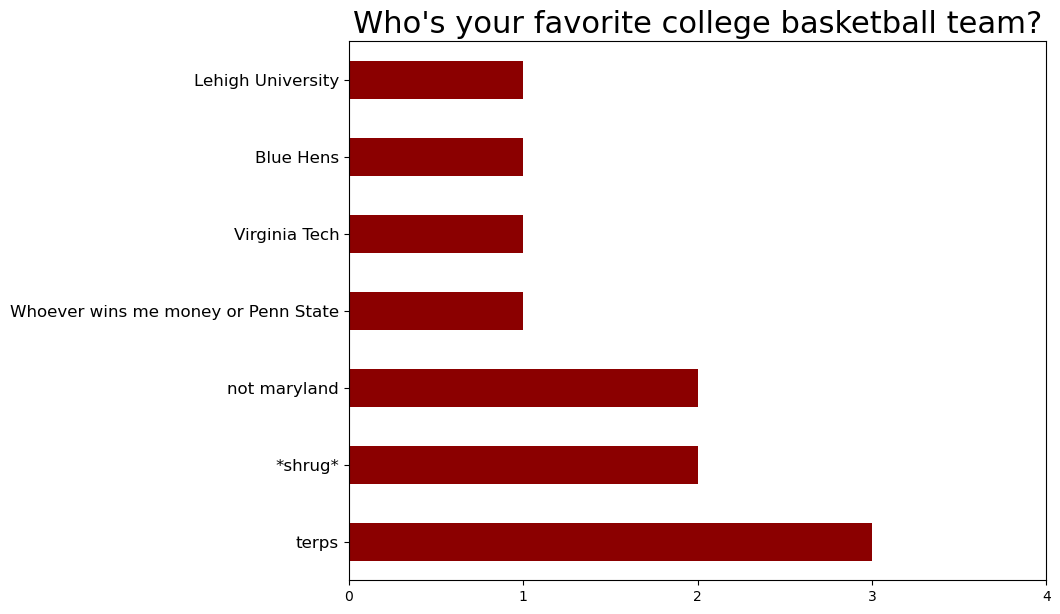

In [15]:
plt.subplots(figsize=(9,7))
fam['Fav College Bball'].value_counts().plot(kind='barh', color='darkred')
plt.xticks((np.arange(0,5, step=1)))
plt.yticks(fontsize=12)
plt.title("Who's your favorite college basketball team?", fontsize=22)
plt.show()

In [16]:
fam['Birthday']

0     1996-10-05
1     1993-06-27
2     1994-04-25
3     1988-01-30
4     2001-02-22
5     1998-06-24
6     1992-10-02
7     1990-08-23
8     1995-03-31
9     1998-05-19
10    1994-11-18
Name: Birthday, dtype: object

In [17]:
fam['Birthday'] = pd.to_datetime(fam['Birthday'])

In [18]:
now = pd.to_datetime('now')
fam['age_days'] = now - fam['Birthday']
fam = fam.sort_values(['age_days'], ascending=False)

C:\Users\berns\AppData\Local\Temp\ipykernel_4632\4020295972.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now = pd.to_datetime('now')


In [21]:
fam['years_old'] = fam['Birthday'].apply(lambda x: (now - x).days // 365)
fam['years_old']

3     35
7     32
6     30
1     29
2     28
10    28
8     28
0     26
9     24
5     24
4     22
Name: years_old, dtype: int64

In [23]:
fam['age'] = fam['Birthday'].apply(lambda x: now.year - x.year - 
               ((now.month, now.day) < (x.month, x.day)) 
               )

In [28]:
fam[['Name','Birthday','years_old','age_days', 'age']]

,Name,Birthday,years_old,age_days,age
3,Ariel Abrahams,1988-01-30,35,12845 days 22:19:02.925285,35
7,rafi abrahams,1990-08-23,32,11909 days 22:19:02.925285,32
6,Megan Fitter,1992-10-02,30,11138 days 22:19:02.925285,30
1,Raizel Bernstein,1993-06-27,29,10870 days 22:19:02.925285,29
2,Nina Rebeca Bigler,1994-04-25,28,10568 days 22:19:02.925285,28
10,Deezy Fitter,1994-11-18,28,10361 days 22:19:02.925285,28
8,Eliana Bernstein,1995-03-31,28,10228 days 22:19:02.925285,28
0,Briana Marmelstein,1996-10-05,26,9674 days 22:19:02.925285,26
9,Jess Fitter,1998-05-19,24,9083 days 22:19:02.925285,24
5,Marc Bernstein,1998-06-24,24,9047 days 22:19:02.925285,24


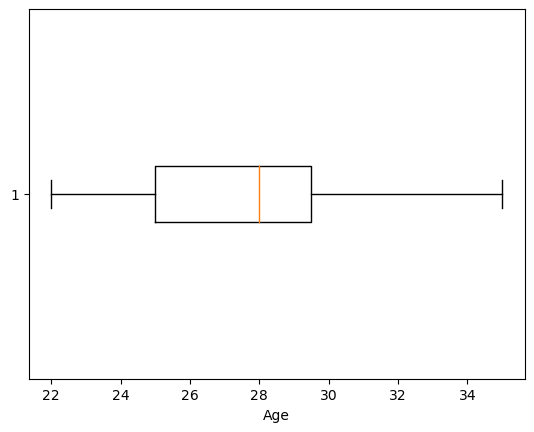

In [30]:
plt.boxplot(fam['years_old'], vert=False)

plt.xlabel('Age')

plt.savefig('cousinboxplot_2023april.png')

In [31]:
fam['years_old'].describe()

count    11.000000
mean     27.818182
std      3.763461 
min      22.000000
25%      25.000000
50%      28.000000
75%      29.500000
max      35.000000
Name: years_old, dtype: float64

In [93]:
fam['years'] = fam['Birthday'].dt.year
fam['months'] = fam['Birthday'].dt.month
fam['days'] = fam['Birthday'].dt.day

In [86]:
fam[['Name','Birthday','years_old','years','months','days']]

,Name,Birthday,years_old,years,months,days
3,Ariel Abrahams,1988-01-30,35,1988,1,30
7,rafi abrahams,1990-08-23,32,1990,8,23
6,Megan Fitter,1992-10-02,30,1992,10,2
1,Raizel Bernstein,1993-06-27,29,1993,6,27
2,Nina Rebeca Bigler,1994-04-25,28,1994,4,25
10,Deezy Fitter,1994-11-18,28,1994,11,18
8,Eliana Bernstein,1995-03-31,28,1995,3,31
0,Briana Marmelstein,1996-10-05,26,1996,10,5
9,Jess Fitter,1998-05-19,24,1998,5,19
5,Marc Bernstein,1998-06-24,24,1998,6,24


In [87]:
str(fam["years"]) + ' years'

'3     1988\n7     1990\n6     1992\n1     1993\n2     1994\n10    1994\n8     1995\n0     1996\n9     1998\n5     1998\n4     2001\nName: years, dtype: int64 years'

In [88]:
fam["years"].astype(str) + ' years'

3     1988 years
7     1990 years
6     1992 years
1     1993 years
2     1994 years
10    1994 years
8     1995 years
0     1996 years
9     1998 years
5     1998 years
4     2001 years
Name: years, dtype: object

In [102]:
fam['age_yr_months_days'] = fam["years_old"].astype(str) + ' years or ' + \
                            fam['age_days'].astype(str) + ' days '

In [103]:
fam['age_yr_months_days']

3     35 years or 12845 days 22:19:02.925285 days 
7     32 years or 11909 days 22:19:02.925285 days 
6     30 years or 11138 days 22:19:02.925285 days 
1     29 years or 10870 days 22:19:02.925285 days 
2     28 years or 10568 days 22:19:02.925285 days 
10    28 years or 10361 days 22:19:02.925285 days 
8     28 years or 10228 days 22:19:02.925285 days 
0     26 years or 9674 days 22:19:02.925285 days  
9     24 years or 9083 days 22:19:02.925285 days  
5     24 years or 9047 days 22:19:02.925285 days  
4     22 years or 8073 days 22:19:02.925285 days  
Name: age_yr_months_days, dtype: object

In [104]:
fam[['Name','Birthday','age_yr_months_days']]                                                             

,Name,Birthday,age_yr_months_days
3,Ariel Abrahams,1988-01-30,35 years or 12845 days 22:19:02.925285 days
7,rafi abrahams,1990-08-23,32 years or 11909 days 22:19:02.925285 days
6,Megan Fitter,1992-10-02,30 years or 11138 days 22:19:02.925285 days
1,Raizel Bernstein,1993-06-27,29 years or 10870 days 22:19:02.925285 days
2,Nina Rebeca Bigler,1994-04-25,28 years or 10568 days 22:19:02.925285 days
10,Deezy Fitter,1994-11-18,28 years or 10361 days 22:19:02.925285 days
8,Eliana Bernstein,1995-03-31,28 years or 10228 days 22:19:02.925285 days
0,Briana Marmelstein,1996-10-05,26 years or 9674 days 22:19:02.925285 days
9,Jess Fitter,1998-05-19,24 years or 9083 days 22:19:02.925285 days
5,Marc Bernstein,1998-06-24,24 years or 9047 days 22:19:02.925285 days


In [46]:
months = list(fam['Birthday'].dt.month)
days = list(fam['Birthday'].dt.day)
names = list(fam['Name'])
zipped = zip(names, days, months)
zipped

In [48]:
for person in zipped:
    print(person)

In [49]:
def zodiac_sign(day, month):
    if month == 12:
        astro_sign = 'sagittarius' if (day < 22) else 'capricorn'
    elif month == 1:
        astro_sign = 'capricorn' if (day < 20) else 'aquarius'
    elif month == 2:
        astro_sign = 'aquarius' if (day < 19) else 'pisces'
    elif month == 3:
        astro_sign = 'pisces' if (day < 21) else 'aries'
    elif month == 4:
        astro_sign = 'aries' if (day < 20) else 'taurus'
    elif month == 5:
        astro_sign = 'taurus' if (day < 21) else 'gemini'
    elif month == 6:
        astro_sign = 'gemini' if (day < 21) else 'cancer'
    elif month == 7:
        astro_sign = 'cancer' if (day < 23) else 'leo'
    elif month == 8:
        astro_sign = 'leo' if (day < 23) else 'virgo'
    elif month == 9:
        astro_sign = 'virgo' if (day < 23) else 'libra'
    elif month == 10:
        astro_sign = 'libra' if (day < 23) else 'scorpio'
    elif month == 11:
        astro_sign = 'scorpio' if (day < 22) else 'sagittarius'
    # print("Your Astrological sign is: ", astro_sign)
    return astro_sign

In [53]:
zodiac_sign(6, 27)

UnboundLocalError: local variable 'astro_sign' referenced before assignment

In [44]:
fam[['Name','Birthday', 'actual age']]

,Name,Birthday,actual age
3,Ariel Abrahams,1988-01-30,"3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: years, dtype: int64years 3 1 \n7 8 \n6 10\n1 6 \n2 4 \n10 11\n8 3 \n0 10\n9 5 \n5 6 \n4 2 \nName: months, dtype: int64months 3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: days, dtype: int64days"
7,rafi abrahams,1990-08-23,"3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: years, dtype: int64years 3 1 \n7 8 \n6 10\n1 6 \n2 4 \n10 11\n8 3 \n0 10\n9 5 \n5 6 \n4 2 \nName: months, dtype: int64months 3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: days, dtype: int64days"
6,Megan Fitter,1992-10-02,"3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: years, dtype: int64years 3 1 \n7 8 \n6 10\n1 6 \n2 4 \n10 11\n8 3 \n0 10\n9 5 \n5 6 \n4 2 \nName: months, dtype: int64months 3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: days, dtype: int64days"
1,Raizel Bernstein,1993-06-27,"3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: years, dtype: int64years 3 1 \n7 8 \n6 10\n1 6 \n2 4 \n10 11\n8 3 \n0 10\n9 5 \n5 6 \n4 2 \nName: months, dtype: int64months 3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: days, dtype: int64days"
2,Nina Rebeca Bigler,1994-04-25,"3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: years, dtype: int64years 3 1 \n7 8 \n6 10\n1 6 \n2 4 \n10 11\n8 3 \n0 10\n9 5 \n5 6 \n4 2 \nName: months, dtype: int64months 3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: days, dtype: int64days"
10,Deezy Fitter,1994-11-18,"3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: years, dtype: int64years 3 1 \n7 8 \n6 10\n1 6 \n2 4 \n10 11\n8 3 \n0 10\n9 5 \n5 6 \n4 2 \nName: months, dtype: int64months 3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: days, dtype: int64days"
8,Eliana Bernstein,1995-03-31,"3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: years, dtype: int64years 3 1 \n7 8 \n6 10\n1 6 \n2 4 \n10 11\n8 3 \n0 10\n9 5 \n5 6 \n4 2 \nName: months, dtype: int64months 3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: days, dtype: int64days"
0,Briana Marmelstein,1996-10-05,"3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: years, dtype: int64years 3 1 \n7 8 \n6 10\n1 6 \n2 4 \n10 11\n8 3 \n0 10\n9 5 \n5 6 \n4 2 \nName: months, dtype: int64months 3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: days, dtype: int64days"
9,Jess Fitter,1998-05-19,"3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: years, dtype: int64years 3 1 \n7 8 \n6 10\n1 6 \n2 4 \n10 11\n8 3 \n0 10\n9 5 \n5 6 \n4 2 \nName: months, dtype: int64months 3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: days, dtype: int64days"
5,Marc Bernstein,1998-06-24,"3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: years, dtype: int64years 3 1 \n7 8 \n6 10\n1 6 \n2 4 \n10 11\n8 3 \n0 10\n9 5 \n5 6 \n4 2 \nName: months, dtype: int64months 3 30\n7 23\n6 2 \n1 27\n2 25\n10 18\n8 31\n0 5 \n9 19\n5 24\n4 22\nName: days, dtype: int64days"


In [113]:
ana = pd.to_datetime("1940-08-12")

In [114]:
now - ana

Timedelta('30182 days 22:19:02.925285')

In [115]:
30182/365

82.69041095890411